# Classification and Comparative Analysis of Hazardous Asteroids using Machine Learning

### Importing the required libraries

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Loading the 'Asteroid' dataset

In [4]:
asteroid = pd.read_csv('dataset.csv')

C:\Users\KIIT0001\AppData\Local\Temp\ipykernel_10516\869556254.py:1: DtypeWarning: Columns (3,4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  asteroid = pd.read_csv('dataset.csv')


### Dimensions of the dataset

In [5]:
asteroid.shape

(958524, 45)

### Columns of the dataset

In [6]:
asteroid.columns

Index(['id', 'spkid', 'full_name', 'pdes', 'name', 'prefix', 'neo', 'pha', 'H',
       'diameter', 'albedo', 'diameter_sigma', 'orbit_id', 'epoch',
       'epoch_mjd', 'epoch_cal', 'equinox', 'e', 'a', 'q', 'i', 'om', 'w',
       'ma', 'ad', 'n', 'tp', 'tp_cal', 'per', 'per_y', 'moid', 'moid_ld',
       'sigma_e', 'sigma_a', 'sigma_q', 'sigma_i', 'sigma_om', 'sigma_w',
       'sigma_ma', 'sigma_ad', 'sigma_n', 'sigma_tp', 'sigma_per', 'class',
       'rms'],
      dtype='object')

### Information about the dataset

In [7]:
asteroid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 958524 entries, 0 to 958523
Data columns (total 45 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   id              958524 non-null  object 
 1   spkid           958524 non-null  int64  
 2   full_name       958524 non-null  object 
 3   pdes            958524 non-null  object 
 4   name            22064 non-null   object 
 5   prefix          18 non-null      object 
 6   neo             958520 non-null  object 
 7   pha             938603 non-null  object 
 8   H               952261 non-null  float64
 9   diameter        136209 non-null  float64
 10  albedo          135103 non-null  float64
 11  diameter_sigma  136081 non-null  float64
 12  orbit_id        958524 non-null  object 
 13  epoch           958524 non-null  float64
 14  epoch_mjd       958524 non-null  int64  
 15  epoch_cal       958524 non-null  float64
 16  equinox         958524 non-null  object 
 17  e         

### Checking for Null Values in the dataset

In [8]:
asteroid.isna().sum()[asteroid.isna().sum()>0]

name              936460
prefix            958506
neo                    4
pha                19921
H                   6263
diameter          822315
albedo            823421
diameter_sigma    822443
ma                     1
ad                     4
per                    4
per_y                  1
moid               19921
moid_ld              127
sigma_e            19922
sigma_a            19922
sigma_q            19922
sigma_i            19922
sigma_om           19922
sigma_w            19922
sigma_ma           19922
sigma_ad           19926
sigma_n            19922
sigma_tp           19922
sigma_per          19926
rms                    2
dtype: int64

### Dropping the columns containing majority null values to avoid data redundancy

In [10]:
asteroid = asteroid.drop(columns=['id', 'full_name', 'name', 'prefix', 'pdes', 'orbit_id', 'epoch', 'epoch_mjd', 'epoch_cal', 'equinox', 'tp', 'tp_cal', 'class'])

In [11]:
# New Shape of the dataset
asteroid.shape

(958524, 32)

### Dropping the null values (Data Cleaning)

In [12]:
asteroid = asteroid.dropna(axis=0)

### New Shape of the dataset after processing it

In [13]:
asteroid.shape

(131142, 32)

### Reduced number of columns now

In [14]:
asteroid.columns

Index(['spkid', 'neo', 'pha', 'H', 'diameter', 'albedo', 'diameter_sigma', 'e',
       'a', 'q', 'i', 'om', 'w', 'ma', 'ad', 'n', 'per', 'per_y', 'moid',
       'moid_ld', 'sigma_e', 'sigma_a', 'sigma_q', 'sigma_i', 'sigma_om',
       'sigma_w', 'sigma_ma', 'sigma_ad', 'sigma_n', 'sigma_tp', 'sigma_per',
       'rms'],
      dtype='object')

### Analyzing the target columns

In [15]:
asteroid['pha'].value_counts()

pha
N    130961
Y       181
Name: count, dtype: int64

In [16]:
asteroid['neo'].value_counts()

neo
N    130403
Y       739
Name: count, dtype: int64

### Encoding the Target columns

In [17]:
asteroid['neo'] = asteroid['neo'].map({'Y':1, 'N':0})
asteroid['neo'] = asteroid['neo'].astype(int)

In [18]:
asteroid['pha'] = asteroid['pha'].map({'Y':1, 'N':0})
asteroid['pha'] = asteroid['pha'].astype(int)

In [19]:
print(asteroid.pha.value_counts())
print(asteroid.neo.value_counts())

pha
0    130961
1       181
Name: count, dtype: int64
neo
0    130403
1       739
Name: count, dtype: int64


### Splitting the data into Testing data and Training data

In [20]:
from sklearn.model_selection import train_test_split
x = asteroid.drop(['pha', 'neo'], axis=1)
y = asteroid[['pha', 'neo']]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, shuffle=True, stratify=y, random_state=42)
print(x_train.shape)
print(x_test.shape)

(104913, 30)
(26229, 30)


### Ensuring all datatypes are of numeric type (int / float)

In [21]:
x_train.dtypes

spkid               int64
H                 float64
diameter          float64
albedo            float64
diameter_sigma    float64
e                 float64
a                 float64
q                 float64
i                 float64
om                float64
w                 float64
ma                float64
ad                float64
n                 float64
per               float64
per_y             float64
moid              float64
moid_ld           float64
sigma_e           float64
sigma_a           float64
sigma_q           float64
sigma_i           float64
sigma_om          float64
sigma_w           float64
sigma_ma          float64
sigma_ad          float64
sigma_n           float64
sigma_tp          float64
sigma_per         float64
rms               float64
dtype: object

In [22]:
x_test.dtypes

spkid               int64
H                 float64
diameter          float64
albedo            float64
diameter_sigma    float64
e                 float64
a                 float64
q                 float64
i                 float64
om                float64
w                 float64
ma                float64
ad                float64
n                 float64
per               float64
per_y             float64
moid              float64
moid_ld           float64
sigma_e           float64
sigma_a           float64
sigma_q           float64
sigma_i           float64
sigma_om          float64
sigma_w           float64
sigma_ma          float64
sigma_ad          float64
sigma_n           float64
sigma_tp          float64
sigma_per         float64
rms               float64
dtype: object

In [23]:
y_train.dtypes

pha    int32
neo    int32
dtype: object

In [24]:
x_test.dtypes

spkid               int64
H                 float64
diameter          float64
albedo            float64
diameter_sigma    float64
e                 float64
a                 float64
q                 float64
i                 float64
om                float64
w                 float64
ma                float64
ad                float64
n                 float64
per               float64
per_y             float64
moid              float64
moid_ld           float64
sigma_e           float64
sigma_a           float64
sigma_q           float64
sigma_i           float64
sigma_om          float64
sigma_w           float64
sigma_ma          float64
sigma_ad          float64
sigma_n           float64
sigma_tp          float64
sigma_per         float64
rms               float64
dtype: object

### Linear Regression Model

In [25]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, root_mean_squared_error
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [26]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, multilabel_confusion_matrix, ConfusionMatrixDisplay
predictionLR = model.predict(x_test)

In [27]:
r2scoreLR = r2_score(y_test, predictionLR)
print(f"R2 Score (Linear Regression) = {r2scoreLR}")
rmse = root_mean_squared_error(y_test, predictionLR)
print(f"Root Mean Squared Error (Linear Regression) = {rmse}")

R2 Score (Linear Regression) = 0.28781599236080435
Root Mean Squared Error (Linear Regression) = 0.045147393522404725


### Logistic Regression Model

In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.multioutput import MultiOutputClassifier
model = MultiOutputClassifier(LogisticRegression())
model.fit(x_train, y_train)

C:\Anaconda\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Anaconda\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result

MultiOutputClassifier(estimator=LogisticRegression())

In [29]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, multilabel_confusion_matrix, ConfusionMatrixDisplay, classification_report
prediction = model.predict(x_test)

In [30]:
accuracy = accuracy_score(y_test, prediction)
precision = precision_score(y_test, prediction, average="micro")
recall = recall_score(y_test, prediction, average="micro")
f1 = f1_score(y_test, prediction, average="micro")
print(f"Accuracy = {accuracy}")
print(f"Precision Score = {precision}")
print(f"Recall Score = {recall}")
print(f"F1 Score = {f1}")

Accuracy = 0.9983224674978077
Precision Score = 0.9161676646706587
Recall Score = 0.8315217391304348
F1 Score = 0.8717948717948718


CONFUSION MATRIX FOR LOGISTIC REGRESSION


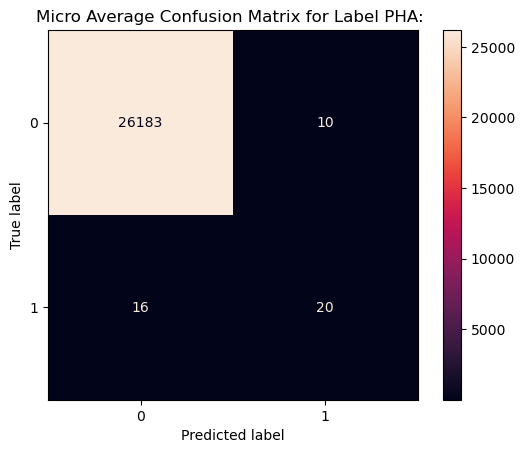

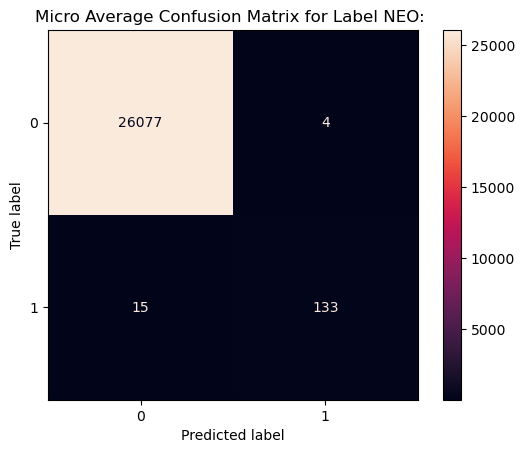

In [31]:
print("CONFUSION MATRIX FOR LOGISTIC REGRESSION")
label_names = ['PHA', 'NEO']
conf_matrix = multilabel_confusion_matrix(y_test, prediction)
for idx, matrix in enumerate(conf_matrix):
    display = ConfusionMatrixDisplay(confusion_matrix=matrix)
    display.plot(cmap="rocket")
    plt.title(f"Micro Average Confusion Matrix for Label {label_names[idx]}: ")
    plt.show()

### Ridge Regression Model

In [32]:
from sklearn.linear_model import Ridge
modelR = Ridge(alpha=1)
modelR.fit(x_train, y_train)

C:\Anaconda\Lib\site-packages\sklearn\linear_model\_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=2.22754e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Ridge(alpha=1)

In [33]:
predictionR = modelR.predict(x_test)

In [34]:
rmse = mean_squared_error(y_test, predictionR)
r2 = r2_score(y_test, predictionR)
rmse = np.sqrt(np.mean((y_test - predictionR) ** 2))
print(f"Root Mean Squared Error (RMSE Loss) = {rmse}")
print(f"R2 Score (Ridge Regression) = {r2}")

Root Mean Squared Error (RMSE Loss) = 0.04638502645417891
R2 Score (Ridge Regression) = 0.2877343401204178


### Lasso Regression Model

In [35]:
from sklearn.linear_model import Lasso
modelL = Lasso(alpha=0.5)
modelL.fit(x_train, y_train)

Lasso(alpha=0.5)

In [36]:
predictionL = modelL.predict(x_test)

In [37]:
mseLasso = mean_squared_error(y_test, predictionR)
r2Lasso = r2_score(y_test, predictionR)
rmse = np.sqrt(np.mean((y_test - predictionL) ** 2))
print(f"Root Mean Squared Error (RMSE Loss) = {rmse}")
print(f"R2 Score (Ridge Regression) = {r2Lasso}")

Root Mean Squared Error (RMSE Loss) = 0.058057371171762566
R2 Score (Ridge Regression) = 0.2877343401204178


### Random Forest Classifier Model

In [38]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(class_weight="balanced", n_estimators=1000)
model.fit(x_train, y_train)

RandomForestClassifier(class_weight='balanced', n_estimators=1000)

In [39]:
prediction = model.predict(x_test)
accuracy = accuracy_score(y_test, prediction)
precision = precision_score(y_test, prediction, average="micro")
recall = recall_score(y_test, prediction, average="micro")
f1 = f1_score(y_test, prediction, average="micro")
report = classification_report(y_test, prediction)

C:\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in samples with no true nor predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [40]:
print(f"Accuracy = {accuracy}")
print(f"Precision Score = {precision}")
print(f"Recall Score = {recall}")
print(f"F1 Score = {f1}")
print(f"Classification Report = {report}")

Accuracy = 0.9998856227839414
Precision Score = 0.994535519125683
Recall Score = 0.9891304347826086
F1 Score = 0.9918256130790191
Classification Report =               precision    recall  f1-score   support

           0       0.97      0.97      0.97        36
           1       1.00      0.99      1.00       148

   micro avg       0.99      0.99      0.99       184
   macro avg       0.99      0.98      0.98       184
weighted avg       0.99      0.99      0.99       184
 samples avg       0.01      0.01      0.01       184



|--- moid_ld <= 19.02
|   |--- sigma_i <= 0.00
|   |   |--- diameter <= 0.09
|   |   |   |--- class: 0
|   |   |--- diameter >  0.09
|   |   |   |--- rms <= 0.67
|   |   |   |   |--- H <= 22.15
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- H >  22.15
|   |   |   |   |   |--- class: 0
|   |   |   |--- rms >  0.67
|   |   |   |   |--- class: 0
|   |--- sigma_i >  0.00
|   |   |--- sigma_e <= 0.00
|   |   |   |--- class: 0
|   |   |--- sigma_e >  0.00
|   |   |   |--- om <= 285.52
|   |   |   |   |--- sigma_e <= 0.03
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- sigma_e >  0.03
|   |   |   |   |   |--- class: 0
|   |   |   |--- om >  285.52
|   |   |   |   |--- class: 0
|--- moid_ld >  19.02
|   |--- diameter <= 1.31
|   |   |--- diameter <= 1.24
|   |   |   |--- e <= 0.31
|   |   |   |   |--- i <= 10.35
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- i >  10.35
|   |   |   |   |   |--- moid <= 0.45
|   |   |   |   |   |   |--- spkid <= 3609926.50
|   |   |   |   

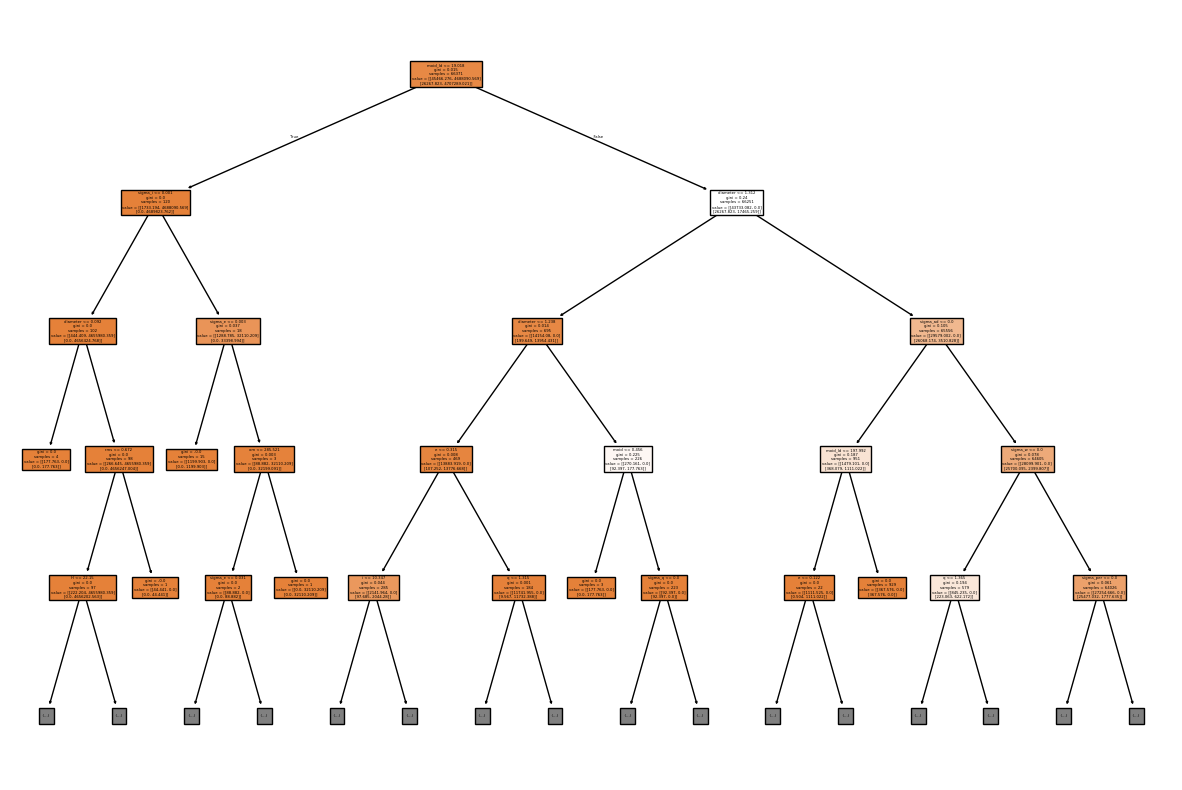

In [41]:
tree = model.estimators_[0]
from sklearn.tree import export_text
# Use x_train.columns instead of feature_names
tree_rules = export_text(tree, feature_names=x_train.columns.tolist())  
print(tree_rules)
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
# Extract one tree from the forest
sample_tree = model.estimators_[0]
# Plot with limited depth
plt.figure(figsize=(15, 10))
plot_tree(sample_tree, feature_names=x_train.columns, max_depth=4, filled=True)
plt.savefig("decision_tree.png", dpi=300, bbox_inches="tight")
plt.show()

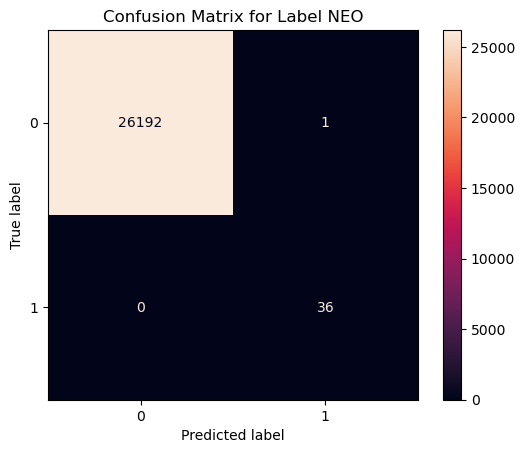

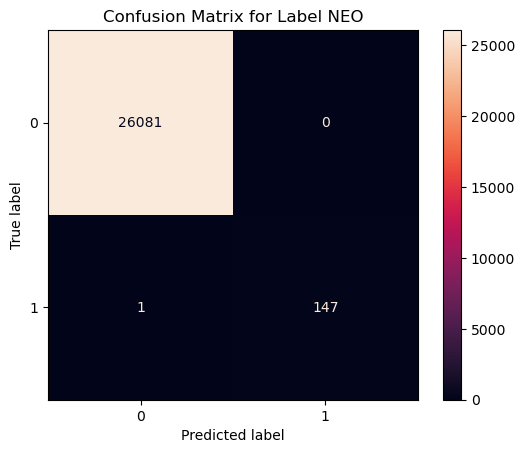

In [114]:
label_names = ["PHA", "NEO"]
conf_matrix = multilabel_confusion_matrix(y_test, prediction)
for label, matrix in enumerate(conf_matrix):
    display = ConfusionMatrixDisplay(confusion_matrix=matrix)
    display.plot(cmap="rocket")
    plt.title(f"Confusion Matrix for Label {label_names[idx]}")
    plt.show()

### Naive Bayes Classification (Gaussian)

In [42]:
from sklearn.naive_bayes import GaussianNB
model = MultiOutputClassifier(GaussianNB())
model.fit(x_train, y_train)

MultiOutputClassifier(estimator=GaussianNB())

In [43]:
prediction = model.predict(x_test)
accuracy = accuracy_score(y_test, prediction)
precision = precision_score(y_test, prediction, average="weighted")
recall = recall_score(y_test, prediction, average="weighted")
f1 = f1_score(y_test, prediction, average="weighted")

Accuracy = 0.9929467383430554
Precision Score = 0.531791872987809
Recall Score = 0.9945652173913043
F1 Score = 0.6853546910755148


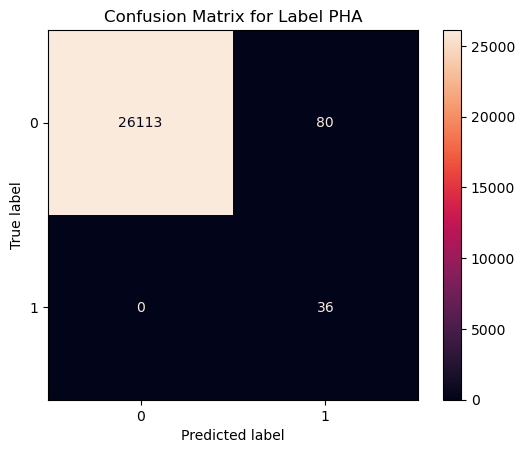

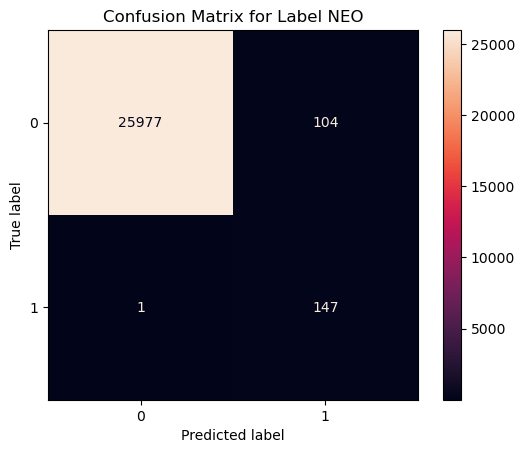

In [44]:
print(f"Accuracy = {accuracy}")
print(f"Precision Score = {precision}")
print(f"Recall Score = {recall}")
print(f"F1 Score = {f1}")

label_names = ["PHA", "NEO"]
conf_matrix = multilabel_confusion_matrix(y_test, prediction)

for label, matrix in enumerate(conf_matrix):
    display = ConfusionMatrixDisplay(confusion_matrix=matrix)
    display.plot(cmap="rocket")
    plt.title(f"Confusion Matrix for Label {label_names[label]}")
    plt.show()

### K - Nearest Neighbour

In [45]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=1)
model.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [46]:
prediction = model.predict(x_test)
accuracy = accuracy_score(y_test, prediction)
precision = precision_score(y_test, prediction, average="micro")
recall = recall_score(y_test, prediction, average="micro")
f1 = f1_score(y_test, prediction, average="micro")
report = classification_report(y_test, prediction)
print(f"Accuracy = {accuracy*100}")
print(f"Precision Score = {precision*100}")
print(f"Recall Score = {recall*100}")
print(f"F1 Score = {f1*100}")
print(f"Classification Report = {report}")

Accuracy = 99.59586716992642
Precision Score = 80.8080808080808
Recall Score = 43.47826086956522
F1 Score = 56.53710247349824
Classification Report =               precision    recall  f1-score   support

           0       0.44      0.22      0.30        36
           1       0.89      0.49      0.63       148

   micro avg       0.81      0.43      0.57       184
   macro avg       0.67      0.35      0.46       184
weighted avg       0.80      0.43      0.56       184
 samples avg       0.00      0.00      0.00       184



C:\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in samples with no true nor predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


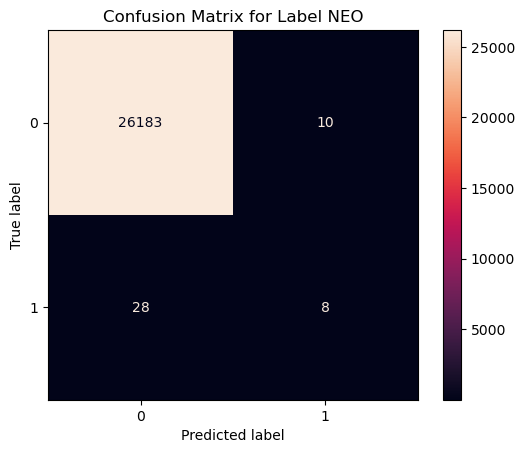

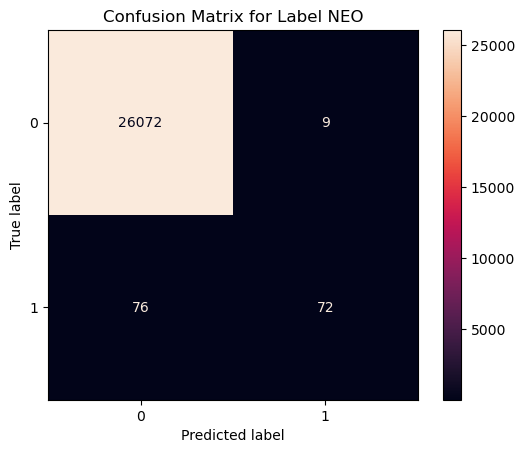

In [47]:
label_names = ["PHA", "NEO"]
conf_matrix = multilabel_confusion_matrix(y_test, prediction)
for label, matrix in enumerate(conf_matrix):
    display = ConfusionMatrixDisplay(confusion_matrix=matrix)
    display.plot(cmap="rocket")
    plt.title(f"Confusion Matrix for Label {label_names[idx]}")
    plt.show()

### Comparative Analysis of all Classification Models

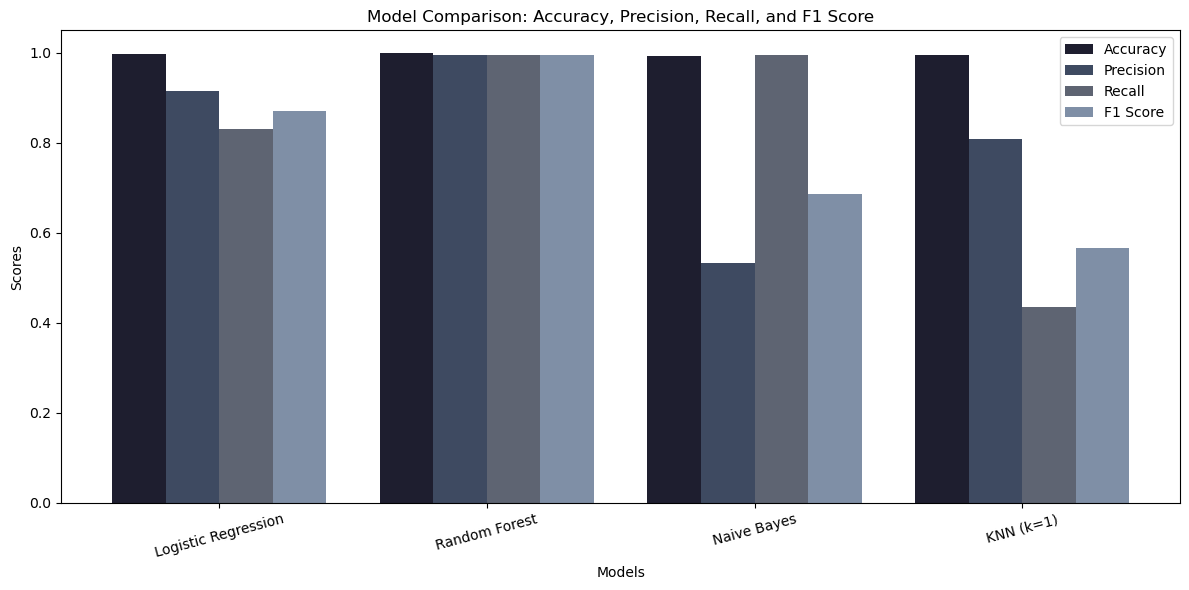

In [56]:
import matplotlib.pyplot as plt
import numpy as np

# Model names
models = ['Logistic Regression', 'Random Forest', 'Naive Bayes', 'KNN (k=1)']

# Metric values
accuracy =  [0.99832, 0.99992, 0.99295, 0.99595]
precision = [0.91617, 0.99456, 0.53179, 0.80808]
recall =    [0.83152, 0.99456, 0.99457, 0.43478]
f1_score =  [0.87180, 0.99450, 0.68535, 0.56530]

# Combine into a list of lists for easy plotting
metrics = [accuracy, precision, recall, f1_score]
metric_names = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
# colors = ['#1749e7', '#3ec47d', '#db5555', '#5d36e1']  # Distinct colors

colors = ['#1e1e2f',  # dark indigo
         '#3e4a61',  # slate blue-grey
         '#5e6472',  # steel plum
         '#7f8fa6']  # muted silver-blue



# X-axis locations for groups
x = np.arange(len(models))
width = 0.2  # Width of each bar

# Create the plot
fig, ax = plt.subplots(figsize=(12, 6))

for i, metric in enumerate(metrics):
    ax.bar(x + i * width, metric, width, label=metric_names[i], color=colors[i])

# Labeling
ax.set_xlabel('Models')
ax.set_ylabel('Scores')
ax.set_title('Model Comparison: Accuracy, Precision, Recall, and F1 Score')
ax.set_xticks(x + 1.5 * width)
ax.set_xticklabels(models, rotation=15)
ax.set_ylim(0, 1.05)
ax.legend()

# Add grid and layout
# ax.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.savefig('model_comparison.png', dpi=300, bbox_inches='tight')
plt.show()